# 실제 detection 수행 

In [33]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import mglearn

from torch.utils.data import TensorDataset # 텐서데이터셋
from torch.utils.data import DataLoader # 데이터로더

In [3]:
dataset_train_df = pd.read_csv('../data/scenarios/scenario1.csv')
dataset_test_df = pd.read_csv('../data/scenarios/scenario1_test.csv')

dataset_train_df = dataset_train_df.sample(frac=1).reset_index(drop=True)
dataset_test_df = dataset_test_df.sample(frac=1).reset_index(drop=True)

In [4]:
x_train = dataset_train_df.iloc[:, 1:-1].values
y_train = dataset_train_df.iloc[:, -1].values

x_test = dataset_test_df.iloc[:, 1:-1].values
y_test = dataset_test_df.iloc[:, -1].values

In [5]:
type(x_train)

numpy.ndarray

In [36]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear', C=1000) # Linear Kernel

#Train the model using the training sets
result = clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [7]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [8]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 1.0
Recall: 1.0


<Figure size 432x288 with 0 Axes>

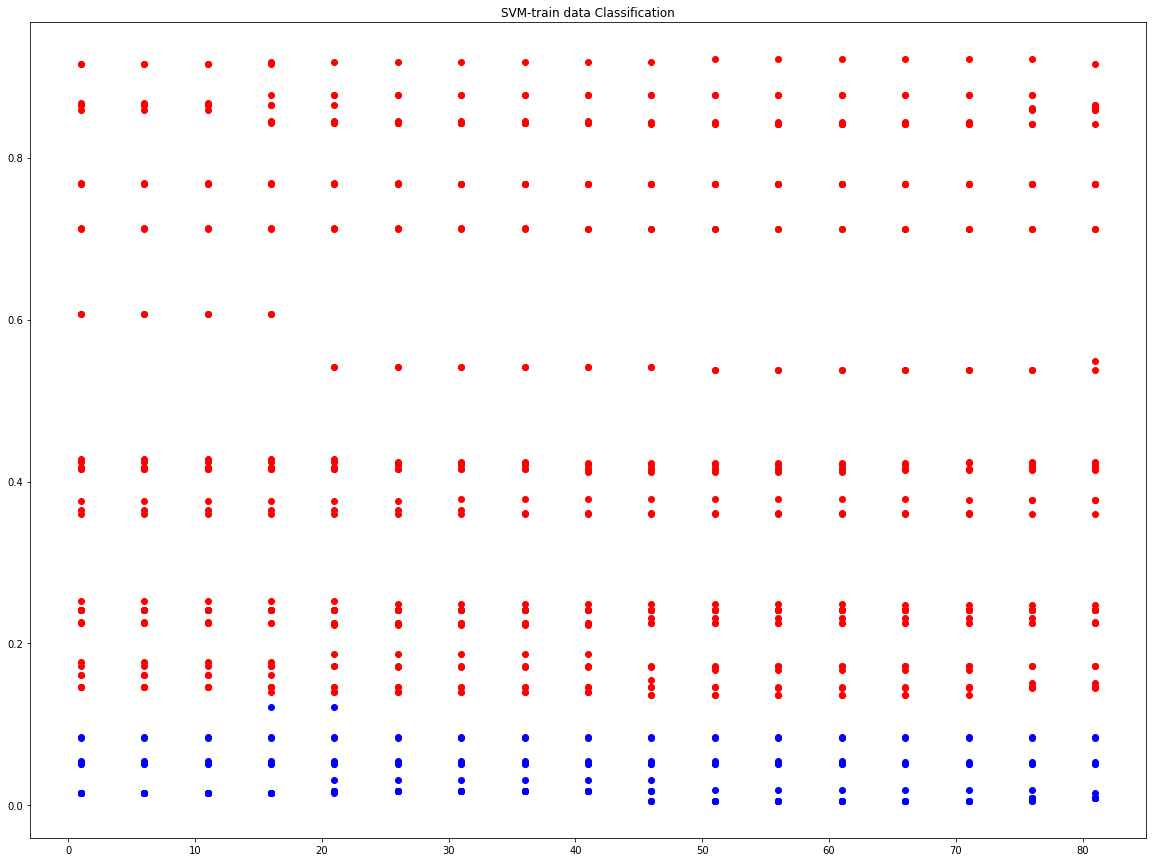

In [55]:
# train data classification plot(with dicision surface, support vector)
plt.figure(3)
plt.figure(figsize=(20, 15))
plt.title("SVM-train data Classification")
predict1 = clf.predict(x_train)
predict1 = predict1.astype(float)
x_scale = np.linspace(1, 83, 83)
for i in range(50):
    if predict1[i] == 0:
        for j in range(0, 83, 5):
            plt.scatter(x_scale[j], x_train[i][j], color='blue')
    if predict1[i] == 1:
        for j in range(0, 83, 5):
            plt.scatter(x_scale[j], x_train[i][j], color='red')


    

<Figure size 432x288 with 0 Axes>

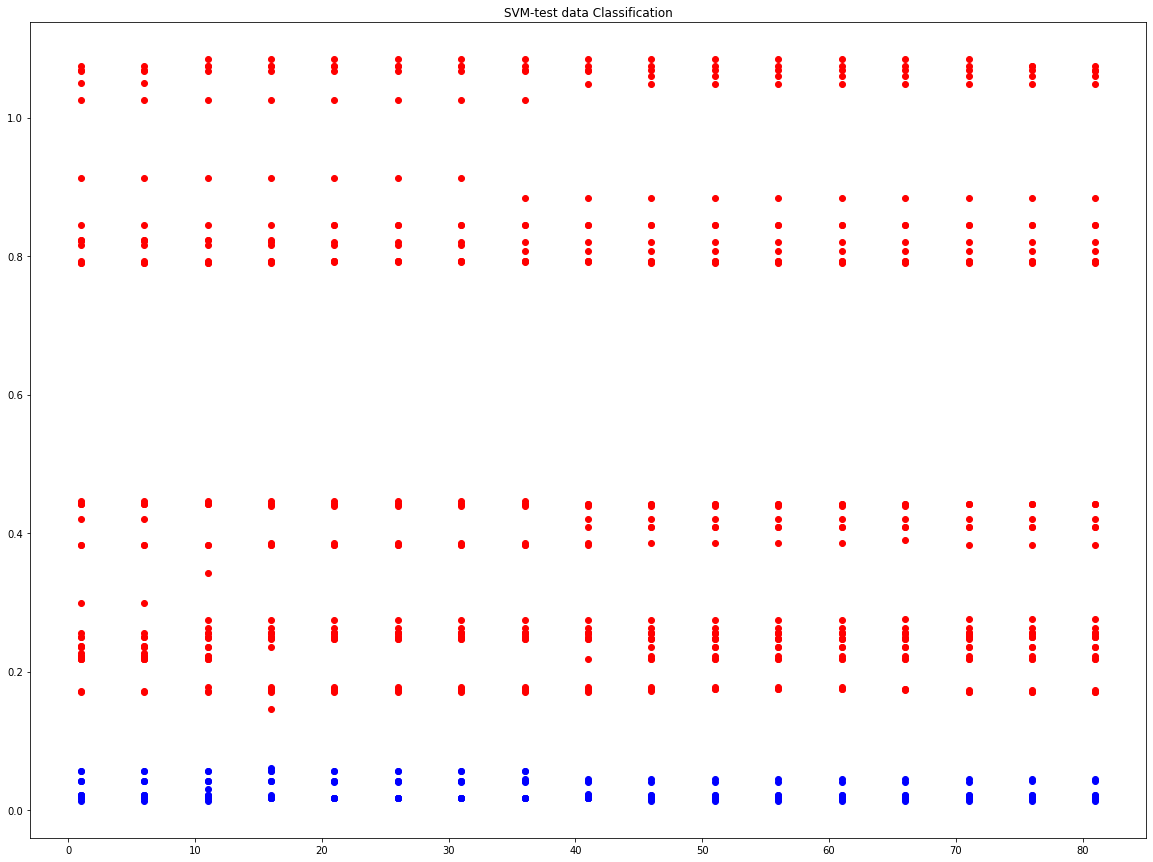

In [56]:
# test data classification plot(with dicision surface, support vector)
plt.figure(3)
plt.figure(figsize=(20, 15))
plt.title("SVM-test data Classification")
predict1 = clf.predict(x_test)
predict1 = predict1.astype(float)
x_scale = np.linspace(1, 83, 83)
for i in range(50):
    if predict1[i] == 0:
        for j in range(0, 83, 5):
            plt.scatter(x_scale[j], x_test[i][j], color='blue')
    if predict1[i] == 1:
        for j in range(0, 83, 5):
            plt.scatter(x_scale[j], x_test[i][j], color='red')

In [3]:
x_train = torch.Tensor(dataset_train_df.iloc[:, 1:-1].values)
y_train =torch.Tensor(dataset_train_df.iloc[:, -1].values)

x_test = torch.Tensor(dataset_test_df.iloc[:, 1:-1].values)
y_test = torch.Tensor(dataset_test_df.iloc[:, -1].values)


In [4]:
# 하이퍼파라미터
BATCH_SIZE = 8
REARNIG_RATE = 0.001
EPOCHS = 10

In [5]:
dataset_train = TensorDataset(x_train, y_train)
dataloader = DataLoader(dataset_train, batch_size=BATCH_SIZE, shuffle=True)

dataset_test = TensorDataset(x_test, y_test)
dataloader_test = DataLoader(dataset_test, batch_size=BATCH_SIZE, shuffle=True)

In [6]:
class Net(nn.Module):
  def __init__(self,input_shape):
    super(Net,self).__init__()
    self.fc1 = nn.Linear(input_shape,32)
    self.fc2 = nn.Linear(32,64)
    self.fc3 = nn.Linear(64,1)

  def forward(self, x):
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = torch.sigmoid(self.fc3(x))
    
    return x

In [20]:
# Model , Optimizer, Loss
model = Net(input_shape=x_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), REARNIG_RATE, weight_decay=1e-3)
loss_fn = nn.BCELoss()

#forward loop
losses = []
accur = []
for i in range(EPOCHS):
  enumerated = 0
  for _, (x_train, y_train) in enumerate(dataloader):
    enumerated += 1
    #calculate output
    prediction = model(x_train)

    #calculate loss
    loss = loss_fn(prediction, y_train.reshape(-1, 1))

    #accuracy
    correct_prediction = torch.eq(prediction.reshape(-1).round(), y_train)
    # print(f'prediction: {prediction.reshape(-1).round()}')
    # print(f'y_train: {y_train}')
    # print(f'correct_prediction: {correct_prediction}')
    acc = correct_prediction.sum() / len(correct_prediction) 
    

    #backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


  print(enumerated)
  
  # if i % 2 == 0:
  print("epoch {} loss : {}  accuracy : {}".format(i, loss, acc))
  losses.append(loss.detach().numpy())
  accur.append(acc.detach().numpy())

75
epoch 0 loss : 0.38107091188430786  accuracy : 0.625
75
epoch 1 loss : 0.13879618048667908  accuracy : 1.0
75
epoch 2 loss : 0.23876816034317017  accuracy : 1.0
75
epoch 3 loss : 0.009747529402375221  accuracy : 1.0
75
epoch 4 loss : 0.03423992916941643  accuracy : 1.0
75
epoch 5 loss : 0.007379228249192238  accuracy : 1.0
75
epoch 6 loss : 0.0063539291732013226  accuracy : 1.0
75
epoch 7 loss : 0.02130288816988468  accuracy : 1.0
75
epoch 8 loss : 0.0006199486670084298  accuracy : 1.0
75
epoch 9 loss : 0.005188501439988613  accuracy : 1.0


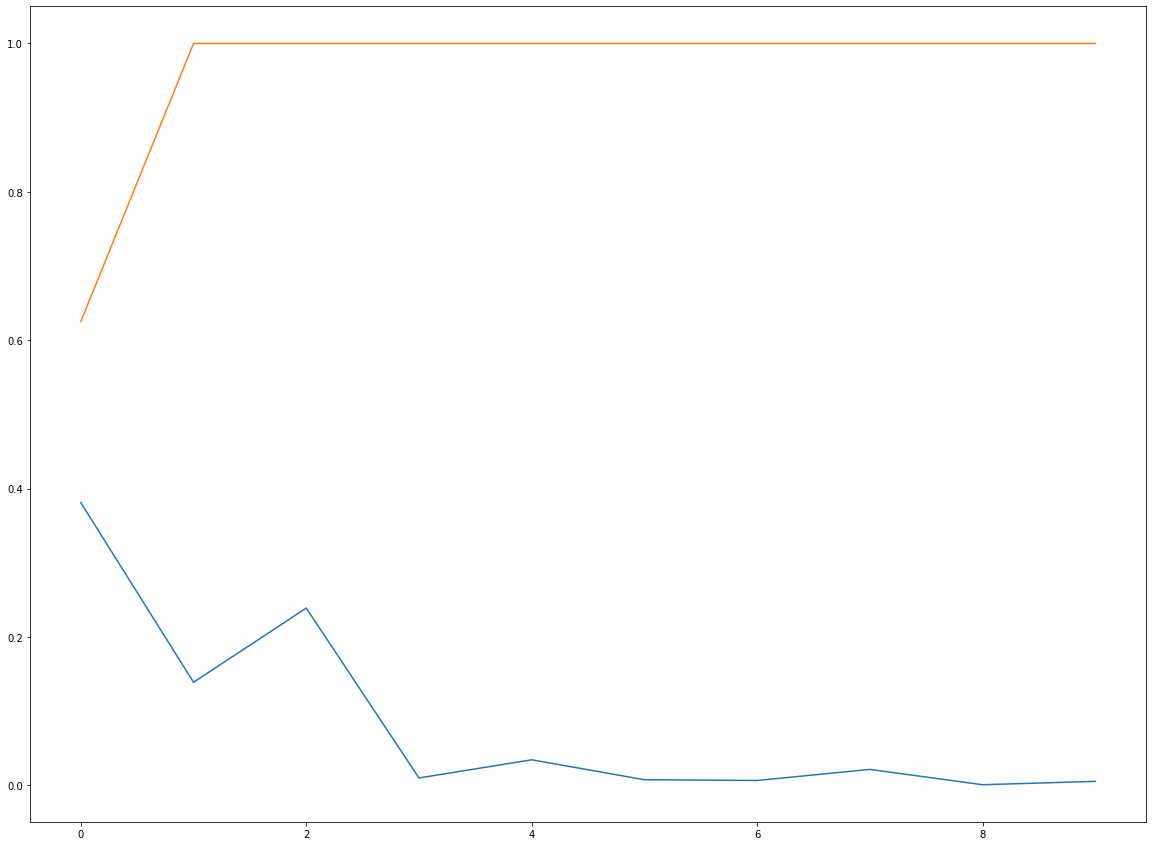

In [21]:
plt.figure(figsize=(20, 15))
plt.plot(losses)
plt.plot(accur)

In [22]:
with torch.no_grad():
    accuracy = []
    # hypothesis = model(x_test)
    # predicted = (hypothesis > 0.5).float()
    # accuracy = (predicted == y_test).float().mean()
    # print(predicted, accuracy)

    for _, (x_test, y_test) in enumerate(dataloader_test):
        #calculate output
        prediction = model(x_test)
        
        #accuracy
        correct_prediction = torch.eq(prediction.reshape(-1).round(), y_test)
        # print(f'prediction: {prediction.reshape(-1).round()}')
        # print(f'y_train: {y_train}')
        # print(f'correct_prediction: {correct_prediction}')
        acc = correct_prediction.sum() / len(correct_prediction) 
        accuracy.append(acc)
        print(f'accuracy: {acc}')

accuracy: 1.0
accuracy: 1.0
accuracy: 1.0
accuracy: 1.0
accuracy: 1.0
accuracy: 1.0
accuracy: 1.0
accuracy: 1.0
accuracy: 1.0
accuracy: 1.0
accuracy: 1.0
accuracy: 1.0
accuracy: 1.0
accuracy: 1.0
accuracy: 1.0
accuracy: 1.0
accuracy: 1.0
accuracy: 1.0
accuracy: 1.0
accuracy: 1.0
accuracy: 1.0
accuracy: 1.0
accuracy: 1.0
accuracy: 1.0
accuracy: 1.0
